In [26]:
import descarteslabs as dl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define ROI
roi = dl.places.shape('north-america_united-states_new-mexico')
tiles = dl.scenes.DLTile.from_shape(roi, resolution=20, tilesize=256, pad=0)

In [46]:
# grab a tile

tiles[0]

DLTile(key=u'256:0:...2:33:798',
       resolution=20.0,
       tilesize=256,
       pad=0,
       crs=u'EPSG:32612',
       bounds=(668960.0, 4085760.0, 674080.0, 4090880.0),
       geometry=<shapely...0b0be790>,
       zone=12,
       ti=33,
       tj=798)

In [56]:
# search for imagery over ROI

scenes, ctx = dl.scenes.search(tiles[5],
                    products=['sentinel-2:L1C'],
                    start_datetime = '2018-06-01',
                    end_datetime = '2018-06-28',
                    limit = 10)

In [57]:
# grab a single scene (cut to ROI)

scene = scenes[0]

In [58]:
# get image array

arr = scene.ndarray('red green blue cloud-mask', ctx)

In [59]:
# define cloud mask

cloud_mask = arr[3, :, :]

In [60]:
rgb = arr[:3,: , :]

In [61]:
print(rgb.shape)

(3, 256, 256)


In [62]:
print (cloud_mask.shape)

(256, 256)


In [63]:
# broadcast to match image dimensions, and clip off the cloud mask

cloud_mask_3d = np.broadcast_to(cloud_mask, rgb.data.shape)

In [64]:
print(cloud_mask_3d.shape)

(3, 256, 256)


In [65]:
# add the cloud mask to the masked array

masked_arr = np.ma.masked_array(rgb.data, cloud_mask_3d)

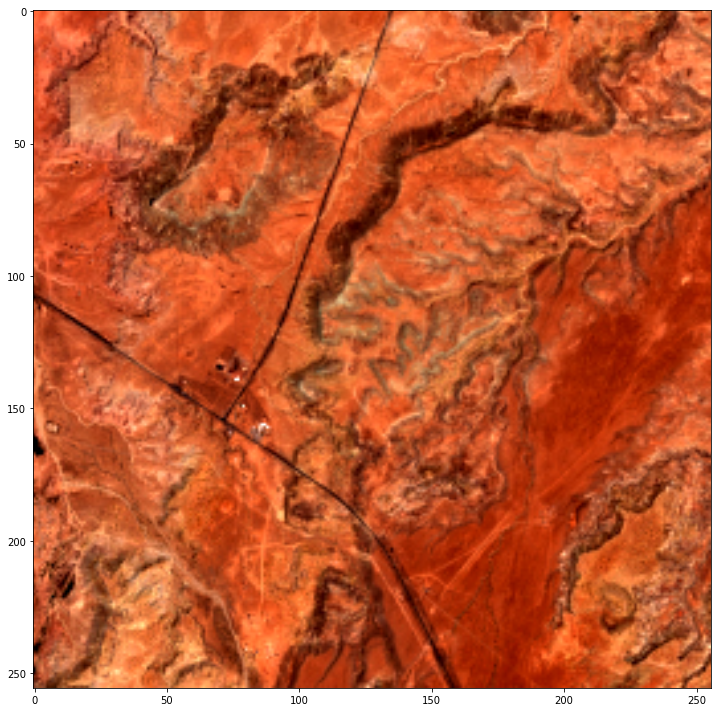

In [55]:
# plot the image

dl.scenes.display(arr[:3,:,:])

In [46]:
print(type(rgb[0,:,:].data))

<type 'numpy.ndarray'>


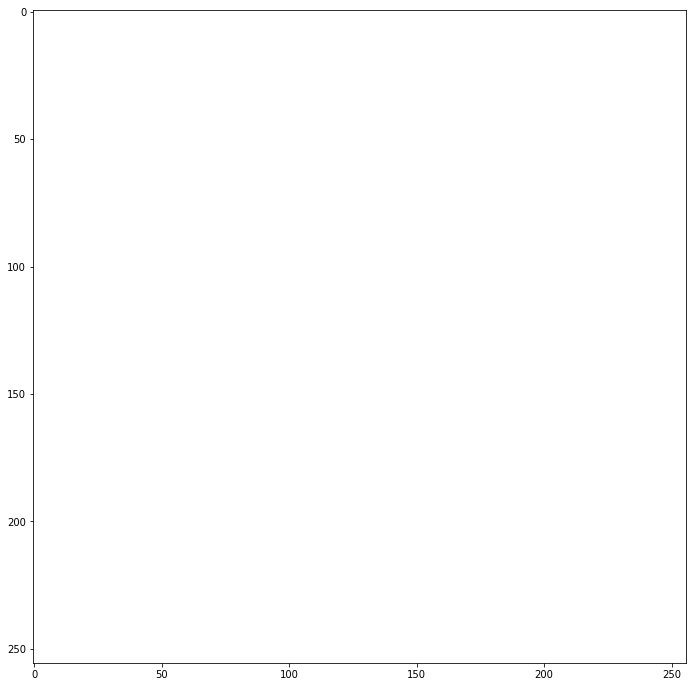

In [48]:
arrays = [rgb[0,:,:].data,rgb[1,:,:].data,rgb[2,:,:].data]

stacked = np.stack(arrays, axis=2)
plt.figure(figsize=(12,12));
plt.imshow(stacked)

In [21]:
print(np.unique(masked_arr, return_counts=True))

(masked_array(data=[689, 778, 779, ..., 3739, 3961, 4347],
             mask=[False, False, False, ..., False, False, False],
       fill_value=999999,
            dtype=uint16), array([1, 1, 1, ..., 1, 1, 1]))
